### Analysis Bug fixing location:

- Searches at india level drop down?
- Does DUB / DAU of new users increase?

In [1]:
import pandas as pd
import numpy as np
from time import time
import json
from sqlalchemy import create_engine
import re
import datetime
#import lifetimes
#import pymc3 as pm

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
# Set up the SQL connection
dbname = 'redshift'
url = 'panamera-ods.cnsuxis6zqxr.us-west-2.redshift.amazonaws.com:5439/panameraods'
engine = create_engine("postgresql://" + 'lucasdresl' + ":" + 'cQsY801a76x82x62aWDT' + "@" + url)

- Answer wether searches at india level drop down after Juan bug fixing?

In [3]:
query = """


drop table if exists new_users;
select
  session_long,
  date_event_nk
   into temp table new_users
 from ods.panameraolx_asia_hydra_ninja_android_last_month a 
   where trackevent='onboarding_show'
  and country_sk='olx|asia|in'
  and app_version = '13.24.00'
group by 1,2


-- Identificacion de las busquedas
;drop table if exists busquedas2;
SELECT
   replace(replace(json_extract_path_text(filters, 'location', 'id', true) , '[' , '') , ']' , '')   AS location_type,
   h.session_long,
   h.date_event_nk,
   resultset_id,
   origin_nk
 into temp table busquedas2
FROM ods.panameraolx_asia_hydra_ninja_android_last_month h
  join new_users b on h.session_long=b.session_long and h.date_event_nk=b.date_event_nk
WHERE country_sk = 'olx|asia|in'
AND trackevent = 'listings_results'
and app_version = '13.24.00'
group by 1,2,3,4,5

-- Group of all other tables
;drop table if exists lastest_table;
select
    case
        when a.location_type = '1000001' then 'India'
        when a.location_type != '1000001' and len(a.location_type) > 4 then 'Polygon'
        when a.location_type = '' then 'Current_location' end as locations,
    a.location_type,
    a.date_event_nk,
    a.session_long,
    a.resultset_id,
    a.origin_nk
  into temp table lastest_table
    from busquedas2 a;

select
  date_event_nk,
  locations,
  count(distinct resultset_id) as qty_busquedas
   from lastest_table
group by 1,2




"""

In [4]:
df = pd.read_sql_query(query.replace('%', '%%'), engine)

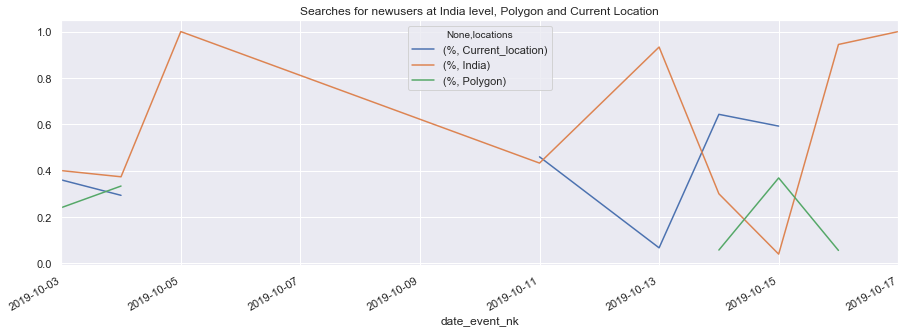

In [5]:
df['total_searches'] = df.groupby(['date_event_nk'])['qty_busquedas'].transform('sum')
df['%'] = df['qty_busquedas'] / df['total_searches']
dfs = df[['date_event_nk' , 'locations' , '%']].set_index(['date_event_nk' , 'locations']).unstack()
dfs.plot(figsize=(15,5) , title='Searches for newusers at India level, Polygon and Current Location')


- Does Replies Per Searches of new users increase?

In [13]:
query = """

drop table if exists new_users;
select
  session_long,
  date_event_nk
   into temp table new_users
 from ods.panameraolx_asia_hydra_ninja_android_last_month a
   where trackevent='onboarding_show'
  and country_sk='olx|asia|in'
  and app_version = '13.22.01'
group by 1,2

-- Identificacions de las busquedas con replies
;drop table if exists exitos_de_busquedas2;
select
  resultset_id,
  count(*) as replies
   into temp table exitos_de_busquedas2
    from ods.panameraolx_asia_hydra_ninja_android_last_month
 where country_sk='olx|asia|in'
 and trackevent in ('item_chat_tap_send_1st_reply' , 'item_tap_call')
 and app_version = '13.22.01'
group by 1

-- Identificacion de las busquedas
;drop table if exists busquedas2;
SELECT
   replace(replace(json_extract_path_text(filters, 'location', 'id', true) , '[' , '') , ']' , '')   AS location_type,
   h.session_long,
   h.date_event_nk,
   resultset_id,
   origin_nk
 into temp table busquedas2
FROM ods.panameraolx_asia_hydra_ninja_android_last_month h
  join new_users b on h.session_long=b.session_long and h.date_event_nk=b.date_event_nk
WHERE country_sk = 'olx|asia|in'
AND trackevent = 'listings_results'
and app_version = '13.23.03'
group by 1,2,3,4,5

-- Group of all other tables
;drop table if exists lastest_table;
select
    case
        when a.location_type = '1000001' then 'India'
        when a.location_type != '1000001' and len(a.location_type) > 4 then 'Polygon'
        when a.location_type = '' then 'Current_location' end as locations,
    a.location_type,
    a.date_event_nk,
    a.session_long,
    a.resultset_id,
    a.origin_nk,
    case when b.replies is not null then b.replies else 0 end as replies
  into temp table lastest_table
    from busquedas2 a
   left join exitos_de_busquedas2 b on a.resultset_id=b.resultset_id;


select
  date_event_nk,
  locations,
  count(distinct resultset_id) as qty_busquedas,
  sum(replies) as replies
   from lastest_table
group by 1,2



"""

In [14]:
dfa = pd.read_sql_query(query.replace('%', '%%'), engine)

DatabaseError: (psycopg2.DatabaseError) SSL SYSCALL error: Operation timed out

[SQL: 

drop table if exists new_users;
select
  session_long,
  date_event_nk
   into temp table new_users
 from ods.panameraolx_asia_hydra_ninja_android_last_month a
   where trackevent='onboarding_show'
  and country_sk='olx|asia|in'
  and app_version = '13.22.01'
group by 1,2

-- Identificacions de las busquedas con replies
;drop table if exists exitos_de_busquedas2;
select
  resultset_id,
  count(*) as replies
   into temp table exitos_de_busquedas2
    from ods.panameraolx_asia_hydra_ninja_android_last_month
 where country_sk='olx|asia|in'
 and trackevent in ('item_chat_tap_send_1st_reply' , 'item_tap_call')
 and app_version = '13.22.01'
group by 1

-- Identificacion de las busquedas
;drop table if exists busquedas2;
SELECT
   replace(replace(json_extract_path_text(filters, 'location', 'id', true) , '[' , '') , ']' , '')   AS location_type,
   h.session_long,
   h.date_event_nk,
   resultset_id,
   origin_nk
 into temp table busquedas2
FROM ods.panameraolx_asia_hydra_ninja_android_last_month h
  join new_users b on h.session_long=b.session_long and h.date_event_nk=b.date_event_nk
WHERE country_sk = 'olx|asia|in'
AND trackevent = 'listings_results'
and app_version = '13.23.03'
group by 1,2,3,4,5

-- Group of all other tables
;drop table if exists lastest_table;
select
    case
        when a.location_type = '1000001' then 'India'
        when a.location_type != '1000001' and len(a.location_type) > 4 then 'Polygon'
        when a.location_type = '' then 'Current_location' end as locations,
    a.location_type,
    a.date_event_nk,
    a.session_long,
    a.resultset_id,
    a.origin_nk,
    case when b.replies is not null then b.replies else 0 end as replies
  into temp table lastest_table
    from busquedas2 a
   left join exitos_de_busquedas2 b on a.resultset_id=b.resultset_id;


select
  date_event_nk,
  locations,
  count(distinct resultset_id) as qty_busquedas,
  sum(replies) as replies
   from lastest_table
group by 1,2



]
(Background on this error at: http://sqlalche.me/e/4xp6)

In [ ]:
dfa = dfa.sort_values(['date_event_nk' , 'locations'])
dfa['replies_per_searches'] = dfa['replies'] / dfa['qty_busquedas']

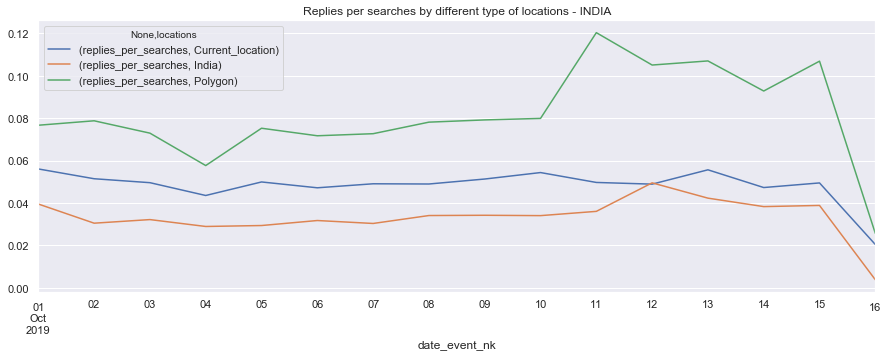

In [12]:
dfas = dfa[['date_event_nk','locations','replies_per_searches']].set_index(['date_event_nk' , 'locations']).unstack()
dfas.plot(figsize=(15,5) , title = 'Replies per searches by different type of locations - INDIA')

- Does replies per searches in Pakistan and Indonesia fall?

In [48]:
countries2 = ['olx|asia|id' , 'olx|mea|pk']

In [49]:
query = """

drop table if exists new_users;
select
  session_long,
  date_event_nk
   into temp table new_users
 from ods.panameraolx_asia_hydra_ninja_android_last_month a
   where trackevent='onboarding_show'
  and country_sk='{0}'
group by 1,2

-- Identificacions de las busquedas con replies
;drop table if exists exitos_de_busquedas2;
select
  resultset_id,
  count(*) as replies
   into temp table exitos_de_busquedas2
    from ods.panameraolx_asia_hydra_ninja_android_last_month
 where country_sk='{0}'
 and trackevent in ('item_chat_tap_send_1st_reply' , 'item_tap_call')
group by 1

-- Identificacion de las busquedas
;drop table if exists busquedas2;
SELECT
   replace(replace(json_extract_path_text(filters, 'location', 'id', true) , '[' , '') , ']' , '')   AS location_type,
   h.session_long,
   h.date_event_nk,
   resultset_id,
   origin_nk
 into temp table busquedas2
FROM ods.panameraolx_asia_hydra_ninja_android_last_month h
  join new_users b on h.session_long=b.session_long and h.date_event_nk=b.date_event_nk
WHERE country_sk = '{0}'
AND trackevent = 'listings_results'
group by 1,2,3,4,5

-- Group of all other tables
;drop table if exists lastest_table;
select
    case
        when a.location_type = '1000001' then 'India'
        when a.location_type != '1000001' and len(a.location_type) > 4 then 'Polygon'
        when a.location_type = '' then 'Current_location' end as locations,
    a.location_type,
    a.date_event_nk,
    a.session_long,
    a.resultset_id,
    a.origin_nk,
    case when b.replies is not null then b.replies else 0 end as replies
  into temp table lastest_table
    from busquedas2 a
   left join exitos_de_busquedas2 b on a.resultset_id=b.resultset_id;


select
  date_event_nk,
  locations,
  count(distinct resultset_id) as qty_busquedas,
  sum(replies) as replies
   from lastest_table
group by 1,2



"""

In [50]:
reply = []
for country in countries2:
    q = query.format(country)
    af = pd.read_sql_query(q , engine)
    af['countrie'] = country
    reply.append(lc)
    

In [ ]:
rps_pkid = pd.concat(reply)
rps_pkid = rps_pkid.sort_values(['date_event_nk' , 'country-'])

- DUB / DAU new users

In [9]:
countries = ['olx|asia|in' , 'olx|asia|id' , 'olx|mea|pk']


In [10]:
query = """
drop table if exists new_users;
select
  session_long,
  user_sk,
  country_sk,
  date_nk
   into temp table new_users
   from ods.fact_user_hydra_browsing_activity
 where 
       user_active_new_returning_nk = 'new'
   and date_nk between '2019-07-25' and '2019-09-15'
   and country_sk = '{0}'
   and channel_sk = 'mobile_app|android'
group by 1,2,3,4

;drop table if exists count_new_users;
select
  date_nk,
  country_sk,
  count(distinct session_long) as new_users
   into temp table count_new_users
       from new_users
group by 1,2
order by 2,1

;drop table if exists new_dub;
select
  date_nk,
  session_long,
  panamera_user_sk,
  a.country_sk
   into temp table new_dub
  from ods.fact_replies a
   join new_users b on a.panamera_user_sk=b.user_sk and a.date_sent_nk=b.date_nk and b.user_sk!='unknown'
where
    a.country_sk = '{0}'
and reply_num_panamera=1
and date_sent_nk between '2019-07-25' and '2019-09-15'

;drop table if exists count_new_dub;
select
  date_nk,
  country_sk,
  count(distinct session_long) as new_dub
   into temp table count_new_dub
    from new_dub
 group by 1,2
 order by 2,1

;drop table if exists dau_and_dub;
select
  a.*,
  b.new_dub
  into temp table dau_and_dub
from count_new_users a
  join count_new_dub b on a.date_nk=b.date_nk and a.country_sk=b.country_sk


;drop table if exists new_dub_mc;
select
    date_nk,
    a.country_sk,
    count(distinct session_long) as new_dub_mc
   into temp table new_dub_mc
  from ods.fact_conversations_daily a
    join new_dub b on a.buyer_sk=b.panamera_user_sk and a.country_sk=b.country_sk
where
      interaction_num_in_conv=6
  and a.country_sk = '{0}'
  and date_sent_nk between '2019-07-25' and '2019-09-15'
  and datediff(days , date_sent_1st_msg_nk , date_nk) = 0
group by 1,2;


select
 a.*,
 b.new_dub_mc
  from dau_and_dub a
   join new_dub_mc b on a.date_nk=b.date_nk and a.country_sk=b.country_sk

"""

In [11]:
result = []
for country in countries:
    q = query.format(country)
    lc = pd.read_sql_query(q, engine)
    result.append(lc)
    

In [26]:
resultss = pd.concat(result)
resultss = resultss.sort_values(['date_nk'])
resultss['dub_over_dau_new'] = resultss['new_dub'] / resultss['new_users']


In [42]:
resultss

dub_over_dau_new                       
country_sk      olx|asia|id olx|asia|in olx|mea|pk
date_nk                                           
2019-07-25              NaN    0.256569   0.230613
2019-07-26              NaN    0.258421   0.228193
2019-07-27              NaN    0.253085   0.232926
2019-07-28              NaN    0.252439   0.233759
2019-07-29              NaN    0.254394   0.233277
2019-07-30              NaN    0.256788   0.236492
2019-07-31              NaN    0.261296   0.237649
2019-08-01              NaN    0.258207   0.240722
2019-08-02              NaN    0.254966   0.238574
2019-08-03              NaN    0.253155   0.241440
2019-08-04              NaN    0.250906   0.236259
2019-08-05              NaN    0.251676   0.237540
2019-08-06              NaN    0.252559   0.236391
2019-08-07              NaN    0.251401   0.236470
2019-08-08              NaN    0.248918   0.241273
2019-08-09              NaN    0.246942   0.249177
2019-08-10              NaN    0.242025   0.246727
2019-08-11              NaN    0.238036   0.228440
2019-08-12              NaN    0.234104   0.215931
2019-08-13              NaN    0.240263   0.248627
2019-08-14              NaN    0.233734   0.244301
2019-08-15              NaN    0.230918   0.253180
2019-08-16              NaN    0.236493   0.258212
2019-08-17              NaN    0.235628   0.259614
2019-08-18              NaN    0.236357   0.262153
2019-08-19              NaN    0.237227   0.257538
2019-08-20         0.225864    0.241676   0.256743
2019-08-21         0.191743    0.243472   0.251849
2019-08-22         0.191901    0.241497   0.248035
2019-08-23         0.188336    0.243616   0.244875
2019-08-24         0.190081    0.242634   0.241919
2019-08-25         0.211922    0.242589   0.242955
2019-08-26         0.209551    0.238358   0.245452
2019-08-27         0.206398    0.240143   0.243004
2019-08-28         0.210662    0.238372   0.249154
2019-08-29         0.209469    0.243800   0.241378
2019-08-30         0.213147    0.241650   0.248013
2019-08-31         0.214337    0.242262   0.248337
2019-09-01         0.225844    0.244255   0.245641
2019-09-02         0.220008    0.240154   0.252473
2019-09-03         0.202041    0.235307   0.232807
2019-09-04         0.219447    0.238142   0.251984
2019-09-05         0.221530    0.230024   0.247338
2019-09-06         0.219592    0.227021   0.243805
2019-09-07         0.216000    0.221925   0.247777
2019-09-08         0.217178    0.223145   0.251539
2019-09-09         0.220315    0.222703   0.255021
2019-09-10         0.223767    0.222751   0.238018
2019-09-11         0.220177    0.217071   0.251266
2019-09-12         0.214853    0.218594   0.249660
2019-09-13         0.214000    0.216982   0.250747
2019-09-14         0.216015    0.214917   0.243660
2019-09-15         0.221200    0.211082   0.246405

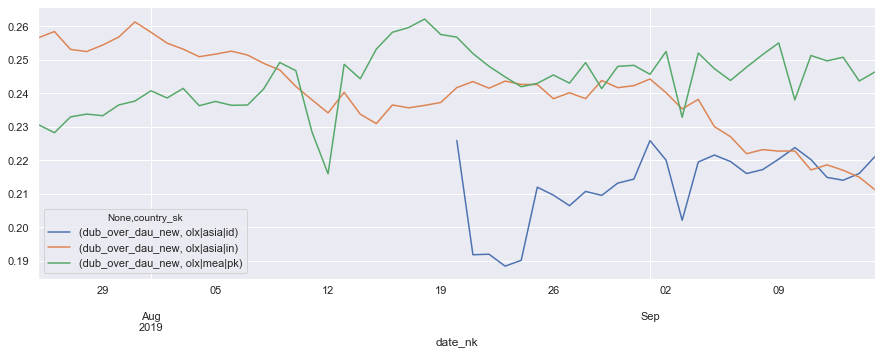

In [27]:
resultss = resultss[['date_nk' , 'country_sk' , 'dub_over_dau_new']].set_index(['date_nk' , 'country_sk']).unstack()
resultss.plot(figsize=(15,5))
